In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


<p style='font-size: 18px'>This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.</p>

## Questions

- Which are the top 5 cities with most reported accidents from February 2016 to March 2023?
- What are the top 10 accident prone streets?
- How many road accidents take place per day?
- What are the top 10 states with most number of road accidents?
- What are the basic weather conditions in most accident cases in USA?

In [6]:
filename = '/kaggle/input/us-accidents/US_Accidents_March23.csv'

In [7]:
df = pd.read_csv(filename)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [10]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
df['Start_Time'] = df['Start_Time'].apply(lambda x: x.split('.')[0])

In [12]:
df['End_Time'] = df['End_Time'].apply(lambda x: x.split('.')[0])

<p style='font-size: 16px'>Start_Time and End_Time are of object type. Change their type to datetime format</p>

In [13]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# City Analysis

In [14]:
cities = df['City'].value_counts()

In [15]:
len(cities)

13678

In [16]:
cities

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [17]:
cities.head(10)/len(df) * 100

City
Miami          2.418575
Houston        2.194622
Los Angeles    2.024884
Charlotte      1.794060
Dallas         1.694259
Orlando        1.419868
Austin         1.259757
Raleigh        1.113802
Nashville      0.943663
Baton Rouge    0.926299
Name: count, dtype: float64

In [18]:
(cities.head(10)/len(df) * 100).sum()

15.789787632462838

## Insights
1. Miami is the city with highest number of road accidents (2.41%)
2. Around 15.8% accident records from February 2016 to March 2023 only come from these 10 cities out of 13678 cities
3. Top 5 cities with most reported accidents are <b>Miami, Houston, Los Angeles, Charlotte, Dallas</b>

In [19]:
cities.head()/7

City
Miami          26702.428571
Houston        24229.857143
Los Angeles    22355.857143
Charlotte      19807.428571
Dallas         18705.571429
Name: count, dtype: float64

In [20]:
cities.head()/(7 * 365)

City
Miami          73.157339
Houston        66.383170
Los Angeles    61.248924
Charlotte      54.266928
Dallas         51.248141
Name: count, dtype: float64

## Insights
4. In the past 7 years, 26702 accidents happened in Miami, 24230 in Houston, 22355 in LA
5. 73 accidents on average per day in Miami, 66 in Houston, 61 in LA(Absurdly huge number)

In [21]:
top_10_cities = pd.DataFrame(cities.head(10).index.values, columns = ['City'])

In [22]:
top_10_cities['State'] = top_10_cities['City'].apply(lambda x: df[df['City'] == x].iloc[0, 14])

In [23]:
top_10_cities

,City,State
0,Miami,FL
1,Houston,TX
2,Los Angeles,CA
3,Charlotte,MI
4,Dallas,GA
5,Orlando,FL
6,Austin,TX
7,Raleigh,NC
8,Nashville,TN
9,Baton Rouge,LA


## Insights
6. Florida and Texas both contains 2 out of top 10 cities with most number of accidents

In [24]:
len(cities[cities == 1])/len(cities) * 100

7.479163620412341

In [25]:
len(cities[cities <= 5])/len(cities) * 100

22.861529463371838

In [26]:
len(cities[cities <= 10])/len(cities) * 100

32.51937417751133

In [27]:
len(cities[cities <= 25])/len(cities) * 100

45.598771750255885

In [28]:
len(cities[cities <= 100])/len(cities) * 100

65.54320807135547

In [29]:
len(cities[cities <= 1000])/len(cities) * 100

91.11712238631378

In [30]:
len(cities[cities >= 5000])/len(cities) * 100

1.6888433981576252

In [31]:
len(cities[cities >= 10000])/len(cities) * 100

0.7676560900716478

## Insights
7. Almost 7.48% of the cities have only one accident record in the past 7 years
8. Almost 22.86% of the cities have upto 5 accidents recorded in the past 7 years
9. Almost 32.52% of the cities have upto 10 total number of accidents
10. Almost 46% of the cities have upto 25 accidents recorded
11. Almost 65.54% of the cities have upto 100 accidents recorded
12. Almost 91.11% of the cities have upto 1000 accidents recorded
13. Only 1.69% of the cities have at least 5000 accidents recorded
14. Only 0.77% of the cities have at least 10000 accidents recorded

# State Analysis

In [32]:
us_States = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

In [33]:
def convert(x):
    return us_States[x]

# create a dataframe of State and their corresponding accident cases
state_df = df['State'].value_counts().reset_index().rename(columns={'count': 'Cases'})
state_df['State'] = state_df['State'].apply(convert)

state_df.head(10)

,State,Cases
0,California,1741433
1,Florida,880192
2,Texas,582837
3,South Carolina,382557
4,New York,347960
5,North Carolina,338199
6,Virginia,303301
7,Pennsylvania,296620
8,Minnesota,192084
9,Oregon,179660


Text(0.5, 1.0, 'Top 10 states with most number of accidents')

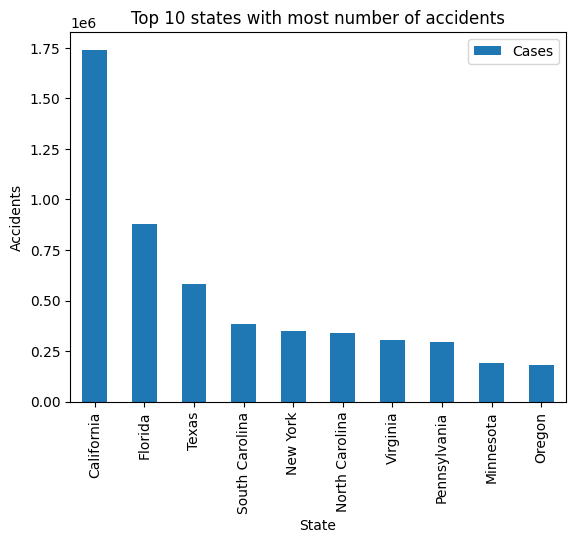

In [34]:
import matplotlib.pyplot as plt
state_df.head(10).plot(x = 'State', y = 'Cases', kind = 'bar')
plt.ylabel('Accidents')
plt.title('Top 10 states with most number of accidents')

In [35]:
df['State'].value_counts()/len(df) * 100

State
CA    22.532922
FL    11.389067
TX     7.541502
SC     4.950019
NY     4.502358
NC     4.376058
VA     3.924502
PA     3.838055
MN     2.485432
OR     2.324674
AZ     2.207561
GA     2.189769
IL     2.186198
TN     2.165883
MI     2.098638
LA     1.937026
NJ     1.820805
MD     1.816898
OH     1.528325
WA     1.400304
AL     1.307439
UT     1.256134
CO     1.175988
OK     1.082334
MO     1.000505
CT     0.918755
IN     0.869831
MA     0.802185
WI     0.448838
KY     0.417344
NE     0.373558
MT     0.368718
IA     0.340394
AR     0.294757
NV     0.280330
KS     0.271622
DC     0.241059
RI     0.219593
MS     0.196431
DE     0.182405
WV     0.178472
ID     0.147197
NM     0.133598
NH     0.132149
WY     0.048613
ND     0.045119
ME     0.034910
VT     0.011982
SD     0.003739
Name: count, dtype: float64

In [36]:
df['State'].value_counts()/(7 * 365)

State
CA    681.578474
FL    344.497847
TX    228.116243
SC    149.728767
NY    136.187867
NC    132.367515
VA    118.708806
PA    116.093933
MN     75.179648
OR     70.317025
AZ     66.774560
GA     66.236399
IL     66.128376
TN     65.513894
MI     63.479843
LA     58.591389
NJ     55.075930
MD     54.957730
OH     46.228963
WA     42.356556
AL     39.547554
UT     37.995695
CO     35.571429
OK     32.738552
MO     30.263405
CT     27.790607
IN     26.310763
MA     24.264579
WI     13.576517
KY     12.623875
NE     11.299413
MT     11.153033
IA     10.296282
AR      8.915851
NV      8.479452
KS      8.216047
DC      7.291585
RI      6.642270
MS      5.941683
DE      5.517417
WV      5.398434
ID      4.452446
NM      4.041096
NH      3.997260
WY      1.470450
ND      1.364775
ME      1.055969
VT      0.362427
SD      0.113112
Name: count, dtype: float64

## Insights
15. California is the state with highest number of accidents recorded
16. More than 22.5% accident cases happen in California
17. Florida is the 2nd highest state with 11.39% accident cases
18. On average, 681 accident cases happen in California per day, California is very vulnerable to accidents.

Text(0.5, 1.0, 'Top 10 states with most number of accidents')

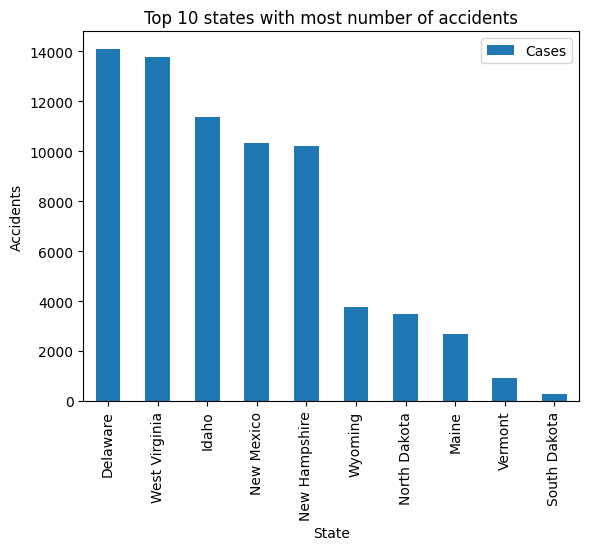

In [37]:
state_df.tail(10).plot(x = 'State', y = 'Cases', kind = 'bar')
plt.ylabel('Accidents')
plt.title('Top 10 states with most number of accidents')

In [38]:
state_df.tail()

,State,Cases
44,Wyoming,3757
45,North Dakota,3487
46,Maine,2698
47,Vermont,926
48,South Dakota,289


## Insights
19. South Dakota has the lowest number of death cases, only 289 accident cases in the past 7 years
20. Only 41 accident cases per year in South Dakota.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [40]:
df['Timezone'].value_counts()

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

Text(0, 0.5, 'Accident Cases')

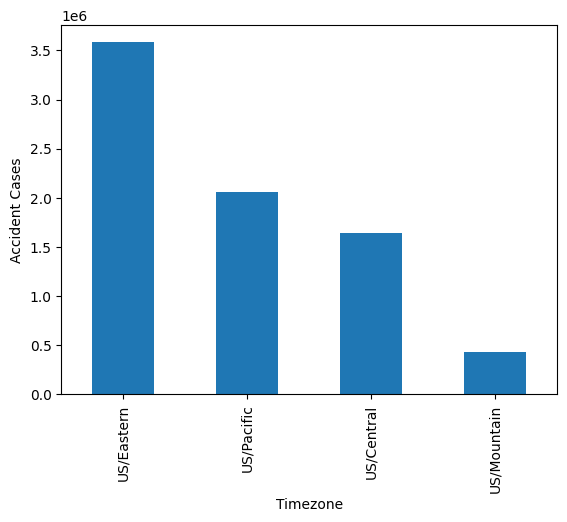

In [41]:
df['Timezone'].value_counts().plot(kind = 'bar')
plt.ylabel('Accident Cases')

Text(0, 0.5, 'Accident Cases Percentage')

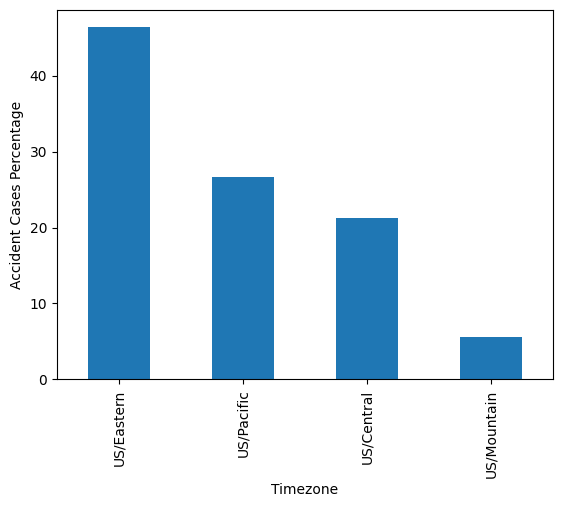

In [42]:
(df['Timezone'].value_counts() / len(df) * 100).plot(kind = 'bar')
plt.ylabel('Accident Cases Percentage')

In [43]:
(df['Timezone'].value_counts() / len(df)) * 100

Timezone
US/Eastern     46.324851
US/Pacific     26.693567
US/Central     21.293117
US/Mountain     5.587435
Name: count, dtype: float64

## Insights
21. Eastern time zone has the highest number of road accident cases (46.32%) in the last 7 years
22. Moutain time zone has the lowest number of road accident cases (5.58%) in the last 7 years

# Street Analysis

In [44]:
street_df = df['Street'].value_counts().reset_index().rename(columns = {'count': 'Cases'})

Text(0.5, 1.0, 'Top 10 Accident Prone Streets in US')

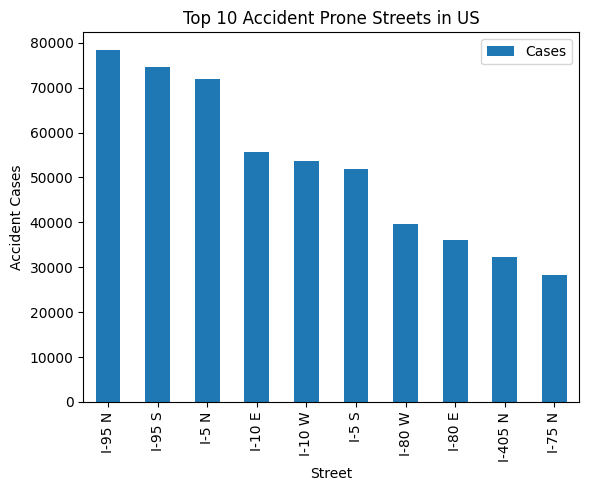

In [45]:
street_df.head(10).plot(x = 'Street', y = 'Cases', kind = 'bar')
plt.ylabel('Accident Cases')
plt.title('Top 10 Accident Prone Streets in US')

In [46]:
df['Street'].value_counts().head(10) / len(df) * 100

Street
I-95 N     1.014829
I-95 S     0.964340
I-5 N      0.931215
I-10 E     0.719063
I-10 W     0.695164
I-5 S      0.670010
I-80 W     0.513198
I-80 E     0.467277
I-405 N    0.418767
I-75 N     0.364448
Name: count, dtype: float64

In [47]:
df['Street'].value_counts().head(10)

Street
I-95 N     78430
I-95 S     74528
I-5 N      71968
I-10 E     55572
I-10 W     53725
I-5 S      51781
I-80 W     39662
I-80 E     36113
I-405 N    32364
I-75 N     28166
Name: count, dtype: int64

In [48]:
df['Street'].value_counts().head(10)/(7 * 365)

Street
I-95 N     30.696673
I-95 S     29.169472
I-5 N      28.167515
I-10 E     21.750294
I-10 W     21.027397
I-5 S      20.266536
I-80 W     15.523288
I-80 E     14.134247
I-405 N    12.666928
I-75 N     11.023875
Name: count, dtype: float64

In [49]:
len(street_df[street_df['Cases'] >= 5 * 7 * 365])

46

In [50]:
len(street_df)

336306

In [51]:
len(street_df[street_df['Cases'] >= 5 * 7 * 365])/len(street_df) * 100

0.01367801942278758

## Insights
23. In the last 7 years, I-95 N street has highest number of accident cases(78430)
24. Roughly 1% of US accidents take place in I-95 street.
25. On average 30.7 accidents take place per day at I-95 N street, 29.17 accidents take place at I-95 S street 28.17 accidents take place at I-5 N street.
26. <b>I-95 N, I-95 S, I-5 N</b> streets are very accident prone.
27. Only on 0.0137% of streets(46 in total), on average 5 accidents occur daily.

In [52]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(10, '<')
street_cases_percentage(25, '<')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

129,934 Streets, 38.64%
274,107 Streets, 81.51%
305,046 Streets, 90.7%
326,421 Streets, 97.06%
817 Streets, 0.24%
133 Streets, 0.04%


## Insights
28. There are 336306 streets enlisted in the dataset.
29. 129934 streets (38.64%) have only 1 accident record in the past 7 years.
30. 274107 streets (81.51%) have less than 10 accidents recorded in the past 7 years
31. 90% streets have less than 25 recorded accidents
32. 97% streets have less than 100 accidents recorded in the past 7 years
33. Only 0.24% of the streets in the US have accident cases greater than 1000
34. Only 133 streets (0.04%) have accident cases greater than 5000

In [58]:
streets = df['Street'].value_counts()

Text(0.5, 0, 'Cases')

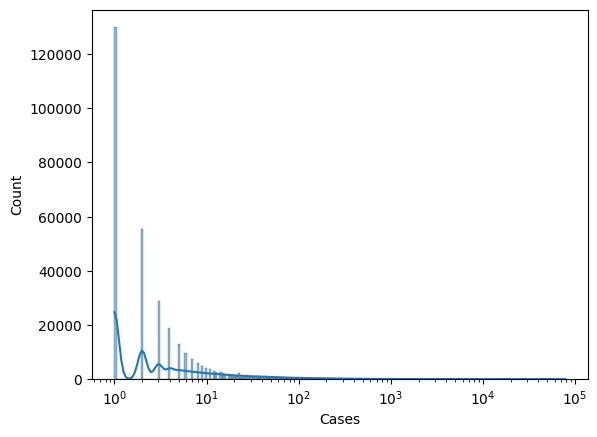

In [64]:
import seaborn as sns
sns.histplot(streets, log_scale = True, kde = True)
plt.xlabel('Cases')

## Insights
35. Number of streets is exponentially distributed over number of accidents.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [66]:
df.isnull().sum().sort_values()

ID                             0
Amenity                        0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Country                        0
Bump                           0
Crossing                       0
County                         0
Source                         0
Severity                       0
Start_Time                     0
Distance(mi)                   0
End_Time                       0
State                          0
Start_Lng                      0
Start_Lat                      0
Description                    5
City                         253
Zipcode                     1915
Timezone                    7808
Street                     10869
Airport_Code               22635
Sunrise_Su

# Source Analysis

In [86]:
sources = df['Source'].value_counts()

<Axes: ylabel='count'>

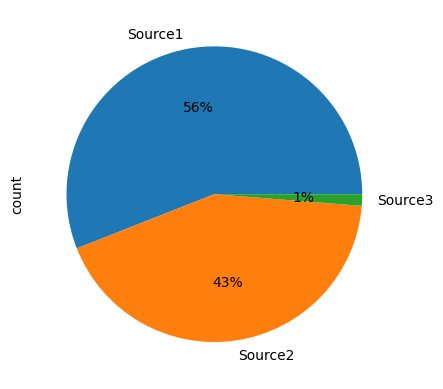

In [87]:
sources.plot(kind = 'pie', autopct='%1.0f%%')

## Insights
36. Most of the accidents are reported by either source 1 or source 2
37. Source 3 reports only 1% of accidents. So, larger focus would be put on source 1 and source 2 accidents.

In [96]:
df['Source'].isnull().sum()

0

In [107]:
## Where these sources operate?
state_sources = pd.crosstab(df['State'], df['Source']).reset_index()

In [117]:
state_sources

RangeIndex(start=0, stop=49, step=1)

In [118]:
state_sources['State'] = state_sources['State'].apply(convert)

In [119]:
state_sources

Source,State,Source1,Source2,Source3
0,Alabama,29739,70316,989
1,Arkansas,21354,1406,20
2,Arizona,92734,77545,330
3,California,1104102,586867,50464
4,Colorado,47671,42455,759
5,Connecticut,48435,22064,506
6,District of Columbia,14898,3661,71
7,Delaware,7722,6355,20
8,Florida,597552,276805,5835
9,Georgia,75056,93311,867


In [122]:
state_sources[state_sources['Source2'] > state_sources['Source1']]['State']

0            Alabama
9            Georgia
12          Illinois
15          Kentucky
16         Louisiana
17     Massachusetts
20          Michigan
25    North Carolina
27          Nebraska
28     New Hampshire
30        New Mexico
33              Ohio
34          Oklahoma
37      Rhode Island
38    South Carolina
40         Tennessee
41             Texas
44           Vermont
45        Washington
Name: State, dtype: object

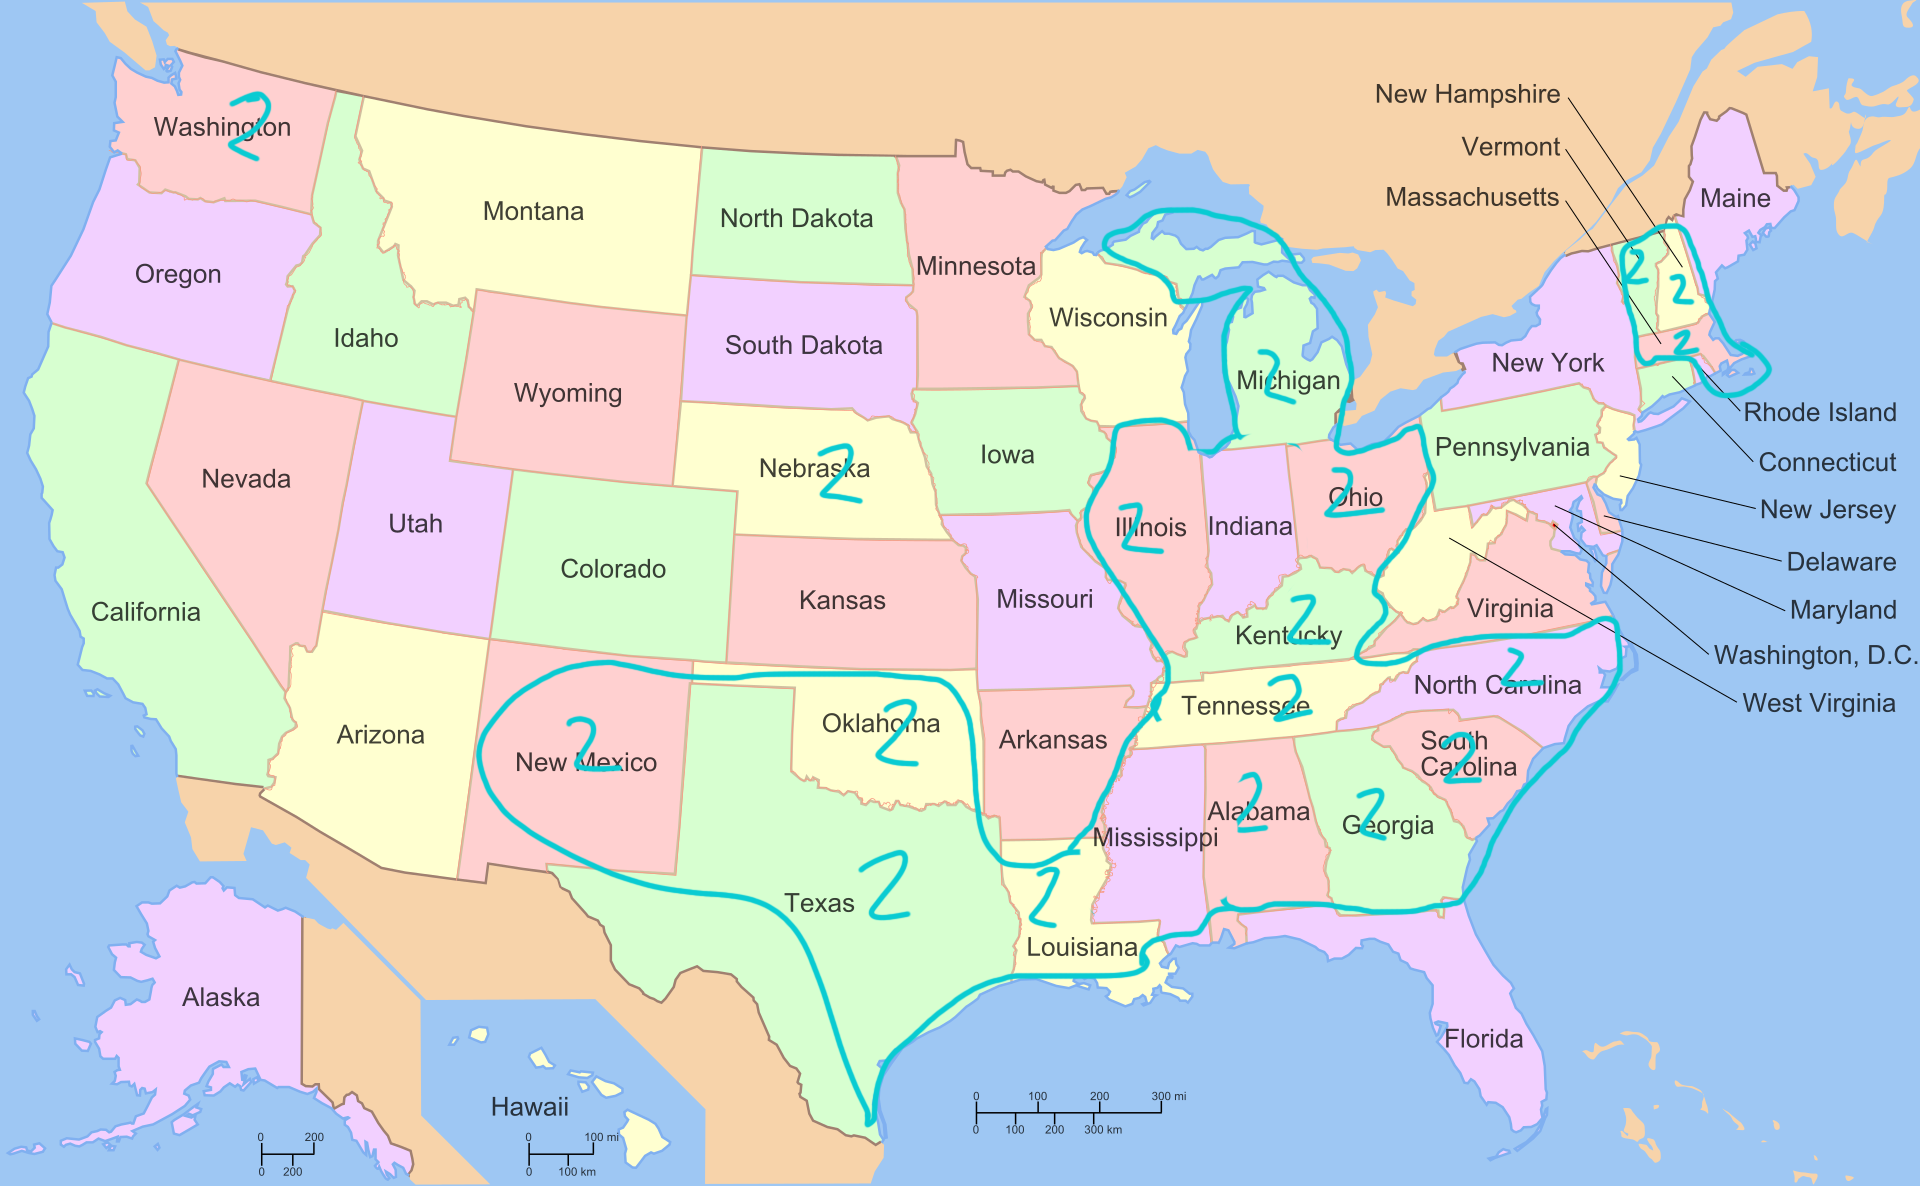

No conclusion about source trends as source 2 seems to be dominant in different areas, and not by much margin

## Insights
38. Distribution of sources across the US is quite random.

# Severity Analysis

Opinion - Severity is put by sources, so different sources might measure severity differently

In [ ]:
df['total_time'] = (df['End_Time'] - df['Start_Time']).apply(lambda x: x.seconds)

In [88]:
df.groupby(['Severity'])['total_time'].mean()

Severity
1     2744.742303
2     6923.102093
3     4073.739603
4    11364.230594
Name: total_time, dtype: float64

In [89]:
df.groupby(['Source', 'Severity'])['total_time'].mean()

Source   Severity
Source1  1            2385.672658
         2            8992.338654
         3           10637.475639
         4           11691.501847
Source2  1            3014.792898
         2            3222.155915
         3            3138.540946
         4            7052.921460
Source3  1            2905.704390
         2            3538.669306
         3            3263.765961
         4            6499.131579
Name: total_time, dtype: float64

## Insights
39. Different sources measure severity differently.
40. We can think of severity 1 as the least severe accident which causes less delay in traffic. The measure of severity 1 pretty much consistent as it is considered to be less delay causing for all three sources.
41. We can consider severity 4 as the most severe accident causing larger delay, though Source1 thinks delay should be much higher for severity 4 cases compared to source2 and source 3

In [123]:
pd.crosstab(df['Source'], df['Severity'])

Severity,1,2,3,4
Source,,,,
Source1,28206,3945613,161528,190285
Source2,35060,2148978,1107062,14273
Source3,4100,62390,30747,152


## Insights
42. Severity 2 graded accidents are recorded mostly in source 1 and almost all the severity 3 graded accidents are recorded in source 2. Source 1's severtiy 2 cases actually impact traffic flow for much longer time than source 2's severity 3 cases. That's why Severity 2 cases actually impact traffic flow for much longer time compared to Severity 3 cases.

In [125]:
df.groupby('Source')['total_time'].mean()

Source
Source1    9129.428063
Source2    3208.493134
Source3    3429.851893
Name: total_time, dtype: float64

## Insights
43. Accident cases observed by source 1 impacted traffic flow for much longer than accident cases observed by source 2 and source 3.
44. Severity 2,3 of source 1 is comparable to severity 4 of source 2 and 3

In [67]:
severities = df['Severity'].value_counts()

In [68]:
severities

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

<Axes: ylabel='count'>

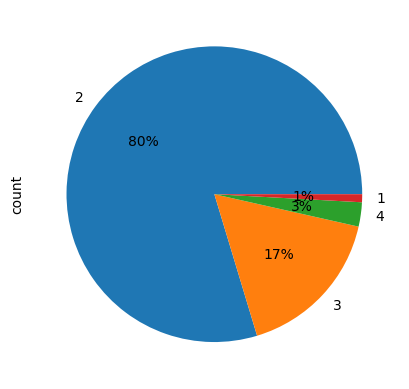

In [74]:
severities.plot(kind = 'pie', autopct='%1.0f%%')

## Insights
45. In 80% cases, impact on traffic was moderate, according to the sources.
46. In 3% cases, impact on traffic was severe.
47. In 1% cases, impact on traffic was low.

# Duration Analysis

In [134]:
duration = (df['total_time'] / 3600).astype('int')

Text(0, 0.5, 'Number of Accidents')

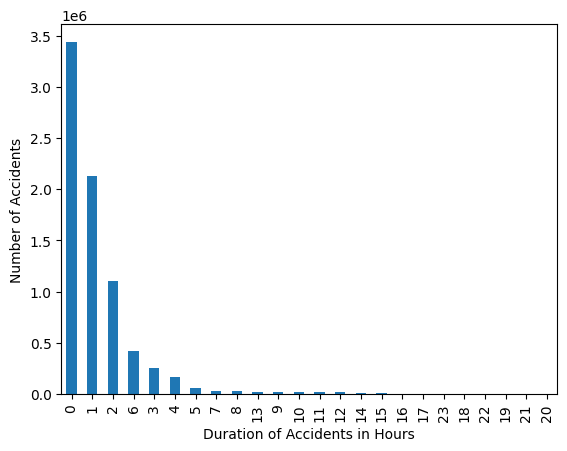

In [137]:
duration.value_counts().plot(kind = 'bar')
plt.xlabel('Duration of Accidents in Hours')
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Percentage of Accidents')

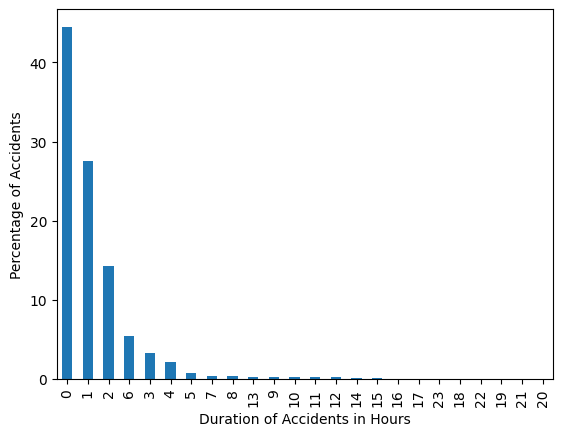

In [138]:
(duration.value_counts() / len(duration) * 100).plot(kind = 'bar')
plt.xlabel('Duration of Accidents in Hours')
plt.ylabel('Percentage of Accidents')

In [139]:
duration.value_counts() / len(duration) * 100

total_time
0     44.481518
1     27.487211
2     14.230149
6      5.385491
3      3.239030
4      2.161872
5      0.794344
7      0.357189
8      0.334455
13     0.236867
9      0.227059
10     0.212269
11     0.209733
12     0.208517
14     0.145321
15     0.088751
16     0.047526
17     0.032491
23     0.027302
18     0.023485
22     0.018995
19     0.017843
21     0.016912
20     0.015669
Name: count, dtype: float64

## Insights
48. Majority of accidents(44.5%) have affected traffic flow for less than 1 hours

In [140]:
(df['total_time'] / 900).astype('int').value_counts() # divide into 15 minute block

total_time
1     1716118
5     1035283
2      920267
3      745484
8      591984
       ...   
83        306
86        298
85        291
81        281
82        274
Name: count, Length: 96, dtype: int64

## Insights
49. In fact, most of the accidents affect traffic flow for 15-30 minutes

# Year Analysis

In [146]:
accident_year = df['Start_Time'].dt.year.value_counts()

Text(0.5, 1.0, 'Accidents over past 7 years in US')

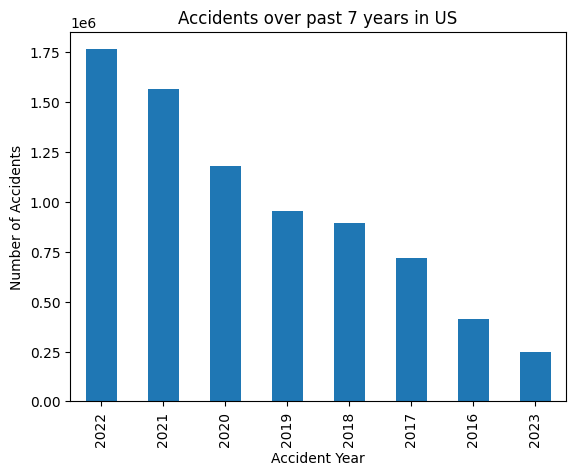

In [148]:
accident_year.plot(kind = 'bar')
plt.xlabel('Accident Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents over past 7 years in US')

In [150]:
(accident_year/len(df)) * 100

Start_Time
2022    22.804893
2021    20.233867
2020    15.254308
2019    12.348012
2018    11.560306
2017     9.291620
2016     5.315736
2023     3.191258
Name: count, dtype: float64

Text(0.5, 1.0, 'Accidents over past 7 years in US')

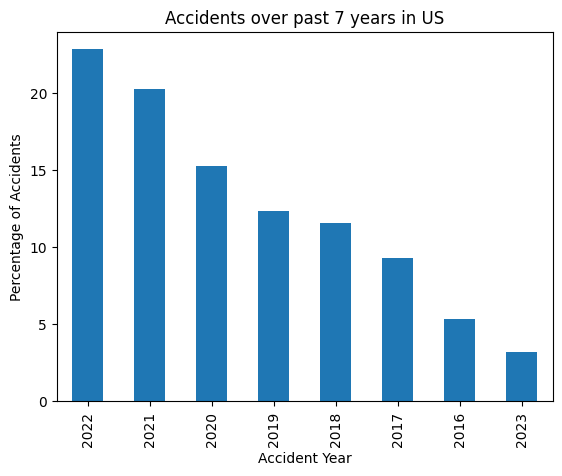

In [151]:
((accident_year/len(df)) * 100).plot(kind = 'bar')
plt.xlabel('Accident Year')
plt.ylabel('Percentage of Accidents')
plt.title('Accidents over past 7 years in US')

In [149]:
accident_year

Start_Time
2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
2023     246633
Name: count, dtype: int64

In [157]:
accident_year_df = accident_year.reset_index().rename(columns={'Start_Time': 'Year', 'count': 'Accident Cases'})
accident_year_df

,Year,Accident Cases
0,2022,1762452
1,2021,1563753
2,2020,1178913
3,2019,954303
4,2018,893426
5,2017,718093
6,2016,410821
7,2023,246633


In [160]:
accident_year_df.sort_values(by=['Year'], inplace = True)
accident_year_df['Accident Growth Rate'] = accident_year_df['Accident Cases'].pct_change(periods=1) * 100
accident_year_df

,Year,Accident Cases,Accident Growth Rate
6,2016,410821,NaN
5,2017,718093,74.794619
4,2018,893426,24.416475
3,2019,954303,6.813883
2,2020,1178913,23.536550
1,2021,1563753,32.643630
0,2022,1762452,12.706546
7,2023,246633,-86.006257


## Insights
50. From 2016 to 2022, accident percentage in US is increasing significantly. We don't know about 2023 yet as we only have data till March 2023
51. 58% of the accidents has happened in the last 3 years
52. US population growth rate is around 0.4% but accident cases are increasing rapidly. Even in 2019 when covid happened and amount of traffic was really low, 6.8% growth is observed in the accident cases.
53. The growth of accident cases is really alarming and something needs to be done about it.

# Questions
- Does different sources operate in different states?
Answer: No

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

Severity
1     2744.742303
2     6923.102093
3     4073.739603
4    11364.230594
Name: total_time, dtype: float64